In [54]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [55]:
filename = "1632560262896716.csv"
pdf = pd.read_csv(filename)
print(pdf.shape)
pdf.head(5)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
print(pdf[["Annual Income (k$)"]].max())
print(pdf[["Annual Income (k$)"]].min())

Annual Income (k$)    137
dtype: int64
Annual Income (k$)    15
dtype: int64


### now we select features that we want :


In [57]:
featureset = pdf[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
print(featureset.shape)
featureset


(200, 3)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [58]:
from sklearn.preprocessing import MinMaxScaler

x = featureset.values #returns a numpy array
feature_mtx = MinMaxScaler().fit_transform(x)
feature_mtx [0:5]


array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

In [59]:
import scipy

leng = feature_mtx.shape[0]
dis_matrix = scipy.zeros([leng, leng])

print(dis_matrix.shape)

for i in range(leng):
    for j in range(leng):
        dis_matrix[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

dis_matrix


(200, 200)


C:\Users\MohamadReza\AppData\Local\Temp\ipykernel_8576\2225674801.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  dis_matrix = scipy.zeros([leng, leng])


array([[0.        , 0.43029381, 0.33738296, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 0.76559158, ..., 0.93683095, 1.20748243,
        1.01507247],
       [0.33738296, 0.76559158, 0.        , ..., 1.16089362, 1.02563246,
        1.27984489],
       ...,
       [1.00888686, 0.93683095, 1.16089362, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.02563246, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.27984489, ..., 0.13432353, 0.66437953,
        0.        ]])

In [60]:
import pylab
import scipy.cluster.hierarchy

Z = hierarchy.linkage(dis_matrix, 'complete')

C:\Users\MohamadReza\AppData\Local\Temp\ipykernel_8576\610127573.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dis_matrix, 'complete')


In [61]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 4, 18,  4, 19, 10, 19,  4, 18,  1, 19,  1, 18,  1, 19,  4, 19, 10,
       19, 12, 18, 10, 19,  1, 19,  1, 19, 12, 10, 12, 18,  1, 19,  1, 18,
       12, 18, 12, 19, 12, 19,  2, 18, 12, 10, 12, 19, 13, 10, 10, 10, 13,
       10, 10,  2, 13, 13, 13,  2, 10, 13,  2,  9,  2, 13,  2,  9, 13,  2,
        9,  8,  2, 13,  2,  2,  2,  9, 13,  8,  9, 13,  2,  8,  2, 13,  9,
       13, 13,  9,  8, 13,  2,  9, 13,  8,  8,  9, 13,  9, 13,  9,  9, 13,
        2,  9, 13,  9,  2, 14,  2,  2,  2,  9,  8,  9,  9,  9,  2, 13, 14,
       13,  9,  8,  8, 17, 11, 17, 14, 17,  6, 17,  7, 17, 11, 17,  3, 17,
        7, 17,  3, 17,  6, 17, 11, 17,  3, 15, 14, 17, 11, 17,  7, 17,  7,
       17,  7, 17,  7, 17,  7, 17, 14, 17,  3, 17,  7, 17,  7, 15, 11, 17,
        7, 17,  7, 15,  6, 17,  6, 17,  6, 15, 11, 15,  7, 15, 11, 15,  6,
       17,  7, 15, 11, 17,  5, 16,  5, 16,  5, 16,  5, 16], dtype=int32)

In [62]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([2, 5, 2, 5, 3, 5, 2, 5, 1, 5, 1, 5, 1, 5, 2, 5, 3, 5, 3, 5, 3, 5,
       1, 5, 1, 5, 3, 3, 3, 5, 1, 5, 1, 5, 3, 5, 3, 5, 3, 5, 1, 5, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 5, 2, 5, 2, 5,
       3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 4, 3, 5, 3, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 4, 3, 5, 2, 5, 2, 4, 2, 5,
       2, 5, 2, 4, 3, 4, 2, 4, 3, 4, 2, 5, 2, 4, 3, 5, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

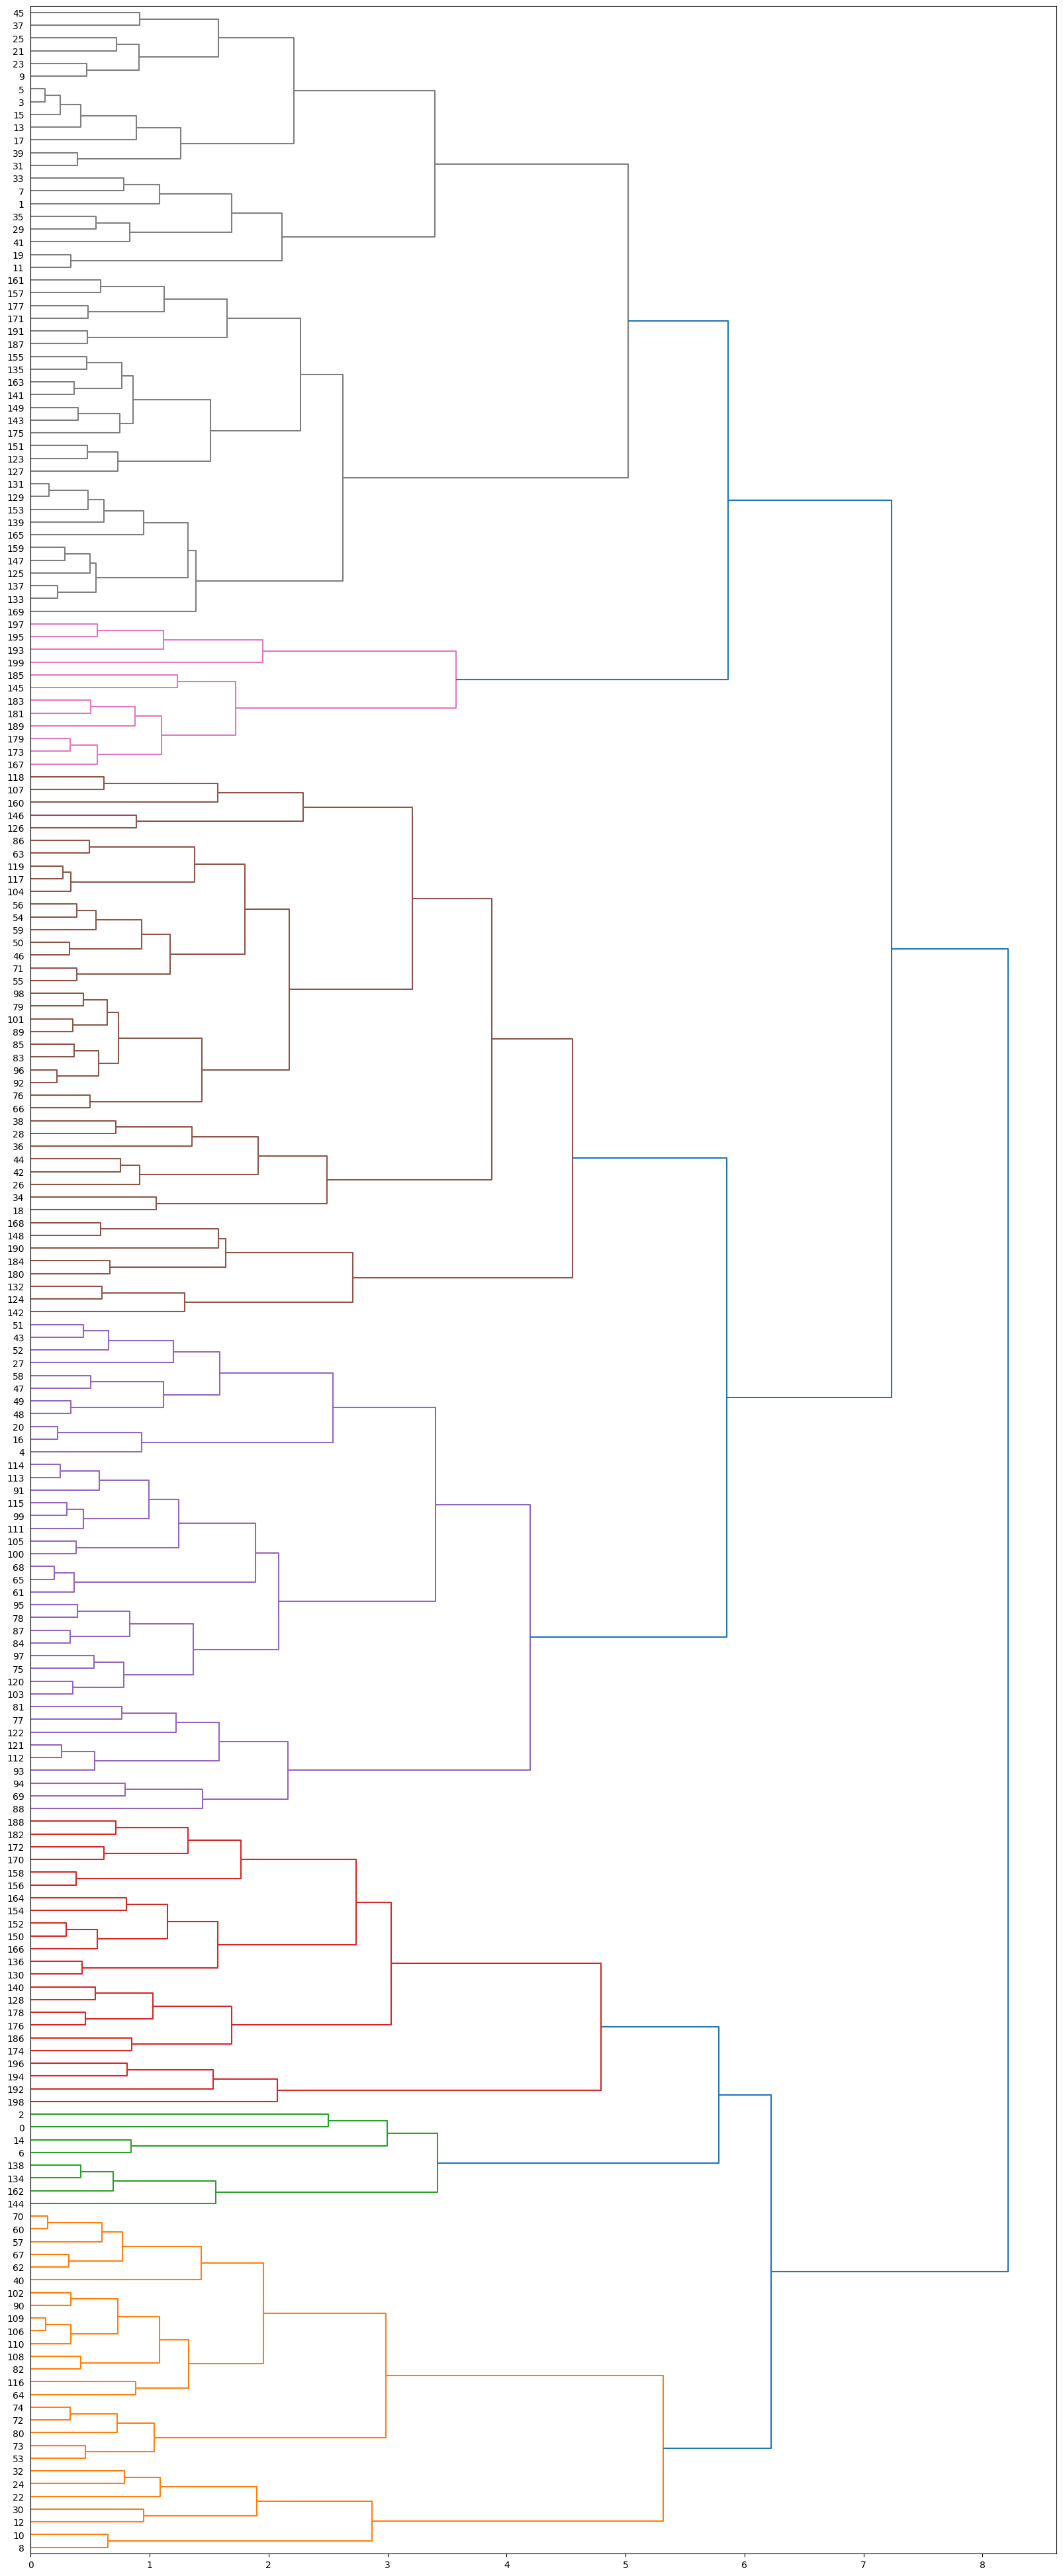

In [74]:
fig = pylab.figure(figsize=(20,50))
def llf(id):
    return '[%s %s %s]' % (pdf['Age'][id], pdf['Annual Income (k$)'][id], int(float(pdf['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,labels=[i for i in range(200)], leaf_rotation=0, leaf_font_size =10, orientation = 'right')